<a href="https://colab.research.google.com/github/pablogonzalez4/Python-for-Pablo/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
# install mplfinance
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpl

# Check files on disk
* Go to https://www.kaggle.com/datasets/adhoppin/financial-data?resource=download and download the data.
* Extract the data in your folder, or updload it on Google Colab.
    * You can directly upload a 'zip' file on Google Drive.
    * Then, you'll have to mount google drive, find the correct folder and unzip the file
    * You can achieve this by  adapting the following code

In [42]:
# Mount your google drive
from google.colab import drive
drive.mount('/content/drive')
!ls drive/MyDrive/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 archive.zip
 Classroom
'Colab Notebooks'
'Exercise Controlling.gsheet'
 InteractiveSheet_2025-09-26_09_16_09.gsheet
'JournalEntries (1).gsheet'
 JournalEntries.gsheet
'Python for finance - lab 2.gslides'
'User Codes.gdoc'


In [27]:
!unzip drive/MyDrive/archive.zip

Archive:  drive/MyDrive/archive.zip
  inflating: Financial Data/cryptocurrencies/ADA-USD.csv  
  inflating: Financial Data/cryptocurrencies/BCH-USD.csv  
  inflating: Financial Data/cryptocurrencies/BTC-USD.csv  
  inflating: Financial Data/cryptocurrencies/ETH-USD.csv  
  inflating: Financial Data/cryptocurrencies/LTC-USD.csv  
  inflating: Financial Data/cryptocurrencies/XRP-USD.csv  
  inflating: Financial Data/currencies/AUD.csv  
  inflating: Financial Data/currencies/CAD.csv  
  inflating: Financial Data/currencies/EUR.csv  
  inflating: Financial Data/currencies/GBP.csv  
  inflating: Financial Data/currencies/INR.csv  
  inflating: Financial Data/currencies/JPY.csv  
  inflating: Financial Data/stocks/AAPL.csv  
  inflating: Financial Data/stocks/ADBE.csv  
  inflating: Financial Data/stocks/AMD.csv  
  inflating: Financial Data/stocks/AMGN.csv  
  inflating: Financial Data/stocks/AMZN.csv  
  inflating: Financial Data/stocks/CMCSA.csv  
  inflating: Financial Data/stocks/CSCO.

In [28]:
import os
dirpath='./Financial Data/stocks'
for dirname, _, filenames in os.walk(dirpath): # for each directory in current folder (./)+path
    for filename in filenames: # for each file in a directory
        print(os.path.join(dirname, filename)) # print the directory/filename

./Financial Data/stocks/CSCO.csv
./Financial Data/stocks/ADBE.csv
./Financial Data/stocks/PYPL.csv
./Financial Data/stocks/AMGN.csv
./Financial Data/stocks/AMZN.csv
./Financial Data/stocks/META.csv
./Financial Data/stocks/MSFT.csv
./Financial Data/stocks/CMCSA.csv
./Financial Data/stocks/GOOG.csv
./Financial Data/stocks/AAPL.csv
./Financial Data/stocks/GOOGL.csv
./Financial Data/stocks/TSLA.csv
./Financial Data/stocks/QCOM.csv
./Financial Data/stocks/NFLX.csv
./Financial Data/stocks/NVDA.csv
./Financial Data/stocks/GILD.csv
./Financial Data/stocks/PEP.csv
./Financial Data/stocks/AMD.csv
./Financial Data/stocks/SBUX.csv
./Financial Data/stocks/INTC.csv


In [46]:
df = pd.read_csv('./Financial Data/stocks/NFLX.csv')

# Open a file as a pandas dataframe

Pandas is very well documented, check here for a complete User Guide :

https://pandas.pydata.org/docs/user_guide/index.html

* Choose one stock file and open it as a DataFrame using the method pd.read_csv(filepath)

In [48]:
df = pd.read_csv('./Financial Data/stocks/NFLX.csv')
df.head(5)

,Date,Open,High,Low,Close,Volume,Symbol,YTD Gains
0,2002-12-31,0.712857,0.800000,0.692857,0.786429,11369400,NFLX,0.000000
1,2003-01-02,0.846429,0.900000,0.810714,0.817857,8397200,NFLX,0.039963
2,2003-01-03,0.850000,0.850000,0.771429,0.772857,3248000,NFLX,-0.017258
3,2003-01-06,0.785714,0.800000,0.762143,0.792857,3003000,NFLX,0.008174
4,2003-01-07,0.771429,0.795714,0.771429,0.783571,1937600,NFLX,-0.003634


In [45]:
df = pd.read_csv('./Financial Data/stocks/GOOGL.csv')
df.head(5)

,Date,Open,High,Low,Close,Volume,Symbol,YTD Gains
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,893181924,GOOGL,0.000000
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,456686856,GOOGL,0.079430
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,365122512,GOOGL,0.090293
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,304946748,GOOGL,0.045146
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,183772044,GOOGL,0.056408


In [31]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/12ELjkaE8Q7vPjIIQR_zTQRA5xKsOH8Aif5U9_snO1Z8/edit#gid=0


# Set up the Dataframe

* convert values in the 'Date' column using pd.to_datetime(dfcolumn)
* set the date as index using df.set_index(column, inplace = True)
* check the first few lines of the dataframe using head()
* what happens if you type 'print(df[(df.index.day==1) & (df.index.month==9)]). Why ?

In [57]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)
df.head()

/tmp/ipython-input-4165128534.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


,Open,High,Low,Close,Volume,Symbol,YTD Gains
Date,,,,,,,
2002-12-31,0.712857,0.800000,0.692857,0.786429,11369400,NFLX,0.000000
2003-01-02,0.846429,0.900000,0.810714,0.817857,8397200,NFLX,0.039963
2003-01-03,0.850000,0.850000,0.771429,0.772857,3248000,NFLX,-0.017258
2003-01-06,0.785714,0.800000,0.762143,0.792857,3003000,NFLX,0.008174
2003-01-07,0.771429,0.795714,0.771429,0.783571,1937600,NFLX,-0.003634


In [58]:
print(df[(df.index.day==1) & (df.index.month==9)])

                  Open        High         Low       Close    Volume Symbol  \
Date                                                                          
2004-09-01    2.001429    2.074286    1.985714    2.038571  12443200   NFLX   
2005-09-01    3.080000    3.107143    3.058571    3.064286   4910500   NFLX   
2006-09-01    2.861429    2.895714    2.850000    2.860000   5992700   NFLX   
2009-09-01    6.170000    6.341429    5.952857    6.021429  10955000   NFLX   
2010-09-01   18.695715   19.464287   18.444286   19.272858  58268000   NFLX   
2011-09-01   33.504288   34.071430   33.218571   33.324287  21085400   NFLX   
2015-09-01  109.349998  111.239998  103.820000  105.790001  35977100   NFLX   
2016-09-01   97.809998   97.980003   96.919998   97.379997   4148600   NFLX   
2017-09-01  175.550003  176.479996  173.919998  174.740005   3813000   NFLX   
2020-09-01  532.599976  557.390015  532.450012  556.549988   9572700   NFLX   
2021-09-01  569.000000  591.000000  569.000000  582.

In [55]:
df['Date'] = df['Date'].dt.strftime("%d-%m-%Y")

In [36]:
df.set_index('Date', inplace = True)

In [37]:
df.head()

,Open,High,Low,Close,Volume,Symbol,YTD Gains
Date,,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,893181924,GOOGL,0.000000
2004-08-20,2.527778,2.729730,2.515015,2.710460,456686856,GOOGL,0.079430
2004-08-23,2.771522,2.839840,2.728979,2.737738,365122512,GOOGL,0.090293
2004-08-24,2.783784,2.792793,2.591842,2.624374,304946748,GOOGL,0.045146
2004-08-25,2.626627,2.702703,2.599600,2.652653,183772044,GOOGL,0.056408


# Plot the closing price
You will start using PyPlot here, the most wellknown plotting library for Python.

Have a look here for a few examples :

https://matplotlib.org/stable/tutorials/pyplot.html

* Use df.plot(y = ..., use_index = True) to visualize the closing price
* Use 'plt' and 'sns' functions to improve your figure
    * Define a size for the figure with plt.figure(figsize = (w,h)), unit is inches (typically (12,8))
    * Use df.plot(y = ..., use_index = True) to visualize the closing price
    * set a title with plt.title
    * set labels with plt.xlabel and plt.ylabel
    * set a sns style with sns.set_style(...), options are 'white', 'whitegrid', 'dark', 'darkgrid'
    * show the plot with plt.show()

<Axes: title={'center': 'Close value'}, xlabel='Date', ylabel='Close'>

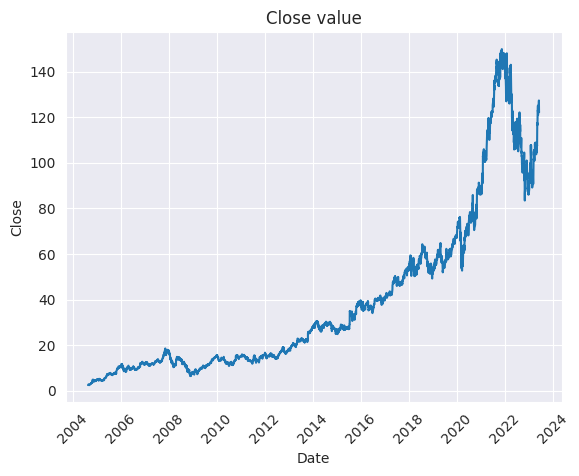

In [43]:
sns.set_style('darkgrid')
sns.despine(left=True, bottom = True)
plt.title('Close value')
plt.xticks(rotation=45)
sns.lineplot(data = df, y = 'Close', x = df.index)


# Daily returns
* Let's add a column to our dataset with daily returns
    * For that, you can apply the function pct_change() to the 'Close' column
    * Check the result using df.head()

In [39]:
df['Daily return'] = df['Close'].pct_change()
df.head()

,Open,High,Low,Close,Volume,Symbol,YTD Gains,Daily return
Date,,,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,893181924,GOOGL,0.000000,NaN
2004-08-20,2.527778,2.729730,2.515015,2.710460,456686856,GOOGL,0.079430,0.079430
2004-08-23,2.771522,2.839840,2.728979,2.737738,365122512,GOOGL,0.090293,0.010064
2004-08-24,2.783784,2.792793,2.591842,2.624374,304946748,GOOGL,0.045146,-0.041408
2004-08-25,2.626627,2.702703,2.599600,2.652653,183772044,GOOGL,0.056408,0.010776


# Plotting daily returns

You will use Seaborn for that plot. Seaborn is a high-level and quite intuitive library.

Check the following link for several plot examples :

https://seaborn.pydata.org/tutorial/introduction.html

* Plot the histogram of daily returns in order to check the distribution
    * This can be done using sns.histplot(..., bins=..., kde=[True/False]). You can vary the bins number and try with or without kde.
    * Don't forget that the first value is a NaN (not a number), you can discard it using df['Your_column'].dropna()
    * You can remove axis if it looks more beautiful to you using sns.despine(left = True). This will remove the top, right (default) and left axis.

<Axes: xlabel='Daily return', ylabel='Count'>

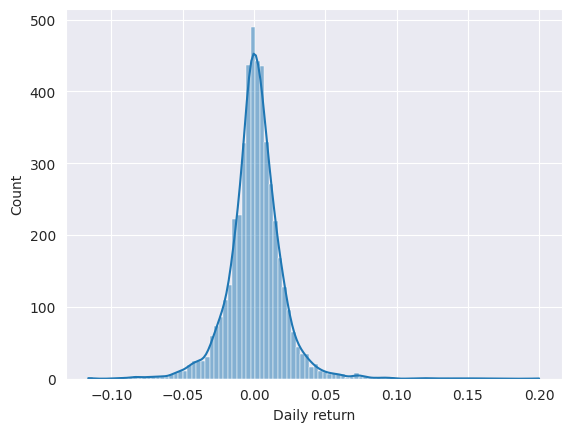

In [40]:
sns.histplot(data = df, x = 'Daily return', bins = 100, kde = True)

# Candlestick charts
Matplotlib also contains a library specialized for Finance, called mplfinance

Have a look here for a list of tutorials :

https://github.com/matplotlib/mplfinance#tutorials

* A bit of preprocessing is needed on the dataframe
    * First, filter the dataframe to only keep data from 2022 or after. In other words, you want all the rows for which df.index.year>2021. Store that in a new dataframe.
    * Then, compute a monthly mean by applying the functions resample(...) and mean() to your new dataframe. Again, store that in a new dataframe.
* Visualize the candlestick plot with mplfinance
    * Import the correct library (mplfinance, usually loaded as mpf)
    * Plot using mpf.plot(..., type = 'candle', style = '...', volume = [True|False])
    * Try different styles, different options and see the impact on the figure